In [1]:
import pandas as pd
import numpy as np
import wfdb
import os
import neurokit2 as nk
import random

In [2]:
np.random.seed(seed=0)
random.seed(0)

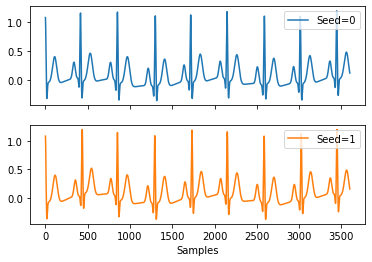

In [3]:
ecg_seed_1 = nk.ecg_simulate(duration=10, noise=0, heart_rate=50, method="ecgsyn", sampling_rate=360, random_state=0)
ecg_seed_2 = nk.ecg_simulate(duration=10, noise=0, heart_rate=50, method="ecgsyn", sampling_rate=360, random_state=1)
methods = pd.DataFrame({"Seed=0": ecg_seed_1, "Seed=1": ecg_seed_2})
nk.signal_plot(methods, subplots=True)

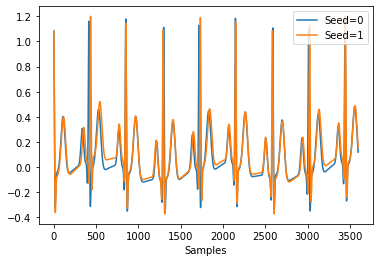

In [4]:
# Check to see how changing the seed affects the simulation
nk.signal_plot(methods)

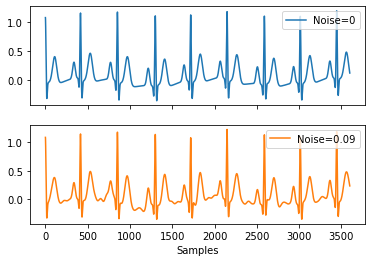

In [5]:
ecg_noise_1 = nk.ecg_simulate(duration=10, noise=0, heart_rate=50, method="ecgsyn", sampling_rate=360, random_state=0)
ecg_noise_2 = nk.ecg_simulate(duration=10, noise=0.09, heart_rate=50, method="ecgsyn", sampling_rate=360, random_state=0)
methods = pd.DataFrame({"Noise=0": ecg_noise_1, "Noise=0.09": ecg_noise_2})
nk.signal_plot(methods, subplots=True)

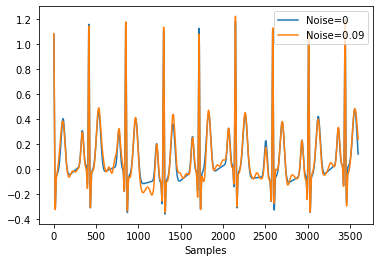

In [6]:
# See how changing the noise parameter affects the simulation
nk.signal_plot(methods)

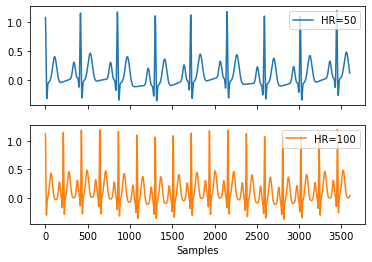

In [7]:
ecg_rate_1 = nk.ecg_simulate(duration=10, noise=0, heart_rate=50, method="ecgsyn", sampling_rate=360, random_state=0)
ecg_rate_2 = nk.ecg_simulate(duration=10, noise=0, heart_rate=100, method="ecgsyn", sampling_rate=360, random_state=0)
methods = pd.DataFrame({"HR=50": ecg_rate_1, "HR=100": ecg_rate_2})
nk.signal_plot(methods, subplots=True)

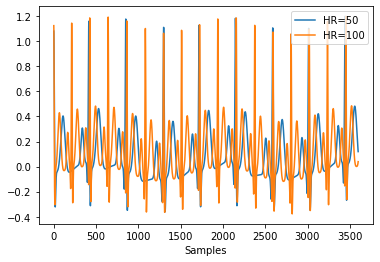

In [8]:
# See how changing the heart rate parameter affects the simulation
nk.signal_plot(methods)

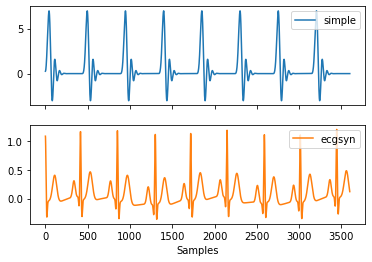

In [13]:
ecg_sim_1 = nk.ecg_simulate(duration=10, noise=0, heart_rate=50, method="simple", sampling_rate=360, random_state=0)
ecg_sim_2 = nk.ecg_simulate(duration=10, noise=0, heart_rate=50, method="ecgsyn", sampling_rate=360, random_state=0)
methods = pd.DataFrame({"simple": ecg_sim_1, "ecgsyn": ecg_sim_2})
nk.signal_plot(methods, subplots=True)

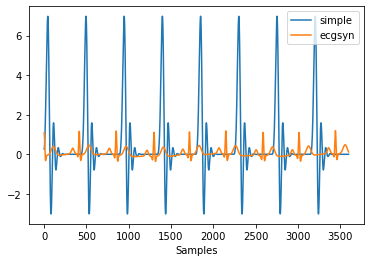

In [14]:
# See how changing the simulator affects the simulation
nk.signal_plot(methods)

In [15]:
def gen_sim_dataset():
    '''
    Generate a dataset of simulated ecg signals from both simulators
    Note this is actually a fairly small dataset, as the simulator output 
    is theoretically infinite is we don't account for similarity
    Currently generates 5000 samples, used for the GECCO 2022 publication
    '''
    sim_dataset = []
    for heart_rate in range(50, 100): # Vary heart rate
        '''
        A normal resting heart rate for adults ranges from 60 to 100 beats per minute. 
        Generally, a lower heart rate at rest implies more efficient heart function and 
        better cardiovascular fitness. For example, a well-trained athlete might have a 
        normal resting heart rate closer to 40 beats per minute.
        '''
        for noise in range(10): # vary noise percentage
            for seed in range(5): # vary seed
                ecg_com = nk.ecg_simulate(duration=10, noise=(noise*0.01), heart_rate=heart_rate, method="ecgsyn", sampling_rate=360, random_state=seed)
                sim_dataset.append(ecg_com)
                
                ecg_simple = nk.ecg_simulate(duration=10, noise=(noise*0.01), heart_rate=heart_rate, method="simple", sampling_rate=360, random_state=seed)
                sim_dataset.append(ecg_simple)
                    
    sim_dataset = np.array(sim_dataset)
    print("Length: ", len(sim_dataset))
    np.save("sim_dataset", sim_dataset, allow_pickle=True)
    return 

In [16]:
gen_sim_dataset()

Length:  5000


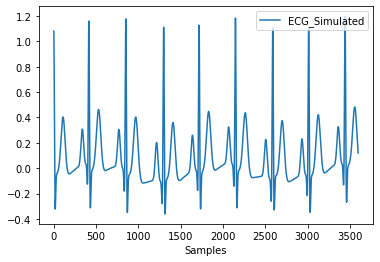

In [17]:
sim_dataset = np.load("sim_dataset.npy", allow_pickle=True)
example_sim = sim_dataset[0]
methods = pd.DataFrame({"ECG_Simulated": example_sim})
nk.signal_plot(methods)